 






# Machine Learning
### Course-End Project Problem Statement
 






  
## Course-End Project: Creating Cohorts of Songs

### Problem Scenario: 
The customer always looks forward to specialized treatment, whether shopping over an e-commerce website or watching Netflix. They want what they might like to see. To keep the customers engaged, it is also crucial for companies to always present the most relevant information. Spotify is a Swedish audio streaming and media service provider. The company has over 456 million active monthly users, including over 195 million paying subscribers, as of September 2022. The company intends to create cohorts of different songs that will aid in the recommendation of songs to users based on various relevant features. Each cohort would contain similar types of songs.
### Problem Objective: 
As a data scientist, you should perform exploratory data analysis and perform cluster analysis to create cohorts of songs. The goal is to gain a better understanding of the various factors that contribute to creating a cohort of songs.

* Note: Download Data Dictionary – Creating cohorts of songs.xlsx from the course resource section in the LMS. 

#### Data Description:
This dataset contains data from Spotify's API about all albums for the Rolling Stones listed on Spotify. It is important to note that all songs have unique IDs.


#### Variable 	Description


*  name	It is the name of the song.

*  album	It is the name of the album.

*  release_date	It is the day, month, and year the album was released.

*  track number	It is the order the song appears on the album.

*  id	It is the Spotify id for the song.

*  uri	It is the Spotify URI for the song.

*  acousticness	A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

*  danceability	It describes how suitable a track is for dancing based on a combination of musical elements, including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is the least danceable, and 1.0 is the most danceable.

*  energy	It is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

*  instrumentalness	It predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

*  liveness	It detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.

*  loudness	The overall loudness of a track in decibels (dB) and loudness values are averaged across the entire track and are useful for comparing the relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 dB.

*  speechiness	It detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g., talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

*  tempo	The overall estimated tempo of a track is in beats per minute (BPM), and in musical terminology, the tempo is the speed or pace of a given piece and derives directly from the average beat duration.

*  valence	A measure from 0.0 to 1.0 describes the musical positiveness conveyed by a track, and tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry).

*  popularity	It is the popularity of the song from 0 to 100.

*  duration_ms	It is the duration of the track in milliseconds.

#### Steps to Perform:

#####	Initial data inspection and data cleaning:
&#9745;	Check whether the data has duplicates, missing values, irrelevant (erroneous entries) values, or outliers.

&#9745;	Depending on your findings, clean the data for further processing.
#####	Perform Exploratory Data Analysis and Feature Engineering:
&#9745;	Use appropriate visualizations to find out which two albums should be recommended to anyone based on the number of popular songs in an album.

&#9745;	Perform exploratory data analysis to dive deeper into different features of songs and identify the pattern.

&#9745;	Discover how a song's popularity relates to various factors and how this has changed over time.
&#9745;	Comment on the importance of dimensionality reduction techniques, share your ideas and explain your observations.
#####	Perform Cluster Analysis:
&#9745;	Identify the right number of clusters
&#9745;	Use appropriate clustering algorithm
&#9745;	Define each cluster based on the features


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings


In [2]:
# Suppressing the warnings
warnings.filterwarnings('ignore')



In [3]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


## Data Inspection and Data Cleaning

In [4]:
# Load Data
df = pd.read_excel('1673873388_rolling_stones_spotify.xlsx')
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [5]:
# Creating a backup dataframe and dropping unneccssary solumns
df_bak = df.copy(deep=1)

df.drop(['Unnamed: 0', 'id', 'uri', 'duration_ms', 'track_number'], axis = 1, inplace = True)

In [6]:
print(f'>>> Shape  : {df.shape}\n')
print(f'>>> Info : ')
df.info()

>>> Shape  : (1610, 13)

>>> Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   acousticness      1610 non-null   float64       
 4   danceability      1610 non-null   float64       
 5   energy            1610 non-null   float64       
 6   instrumentalness  1610 non-null   float64       
 7   liveness          1610 non-null   float64       
 8   loudness          1610 non-null   float64       
 9   speechiness       1610 non-null   float64       
 10  tempo             1610 non-null   float64       
 11  valence           1610 non-null   float64       
 12  popularity        1610 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(1

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
acousticness,1610.0,0.250475,0.227397,0.000009,0.058350,0.18300,0.40375,0.994
danceability,1610.0,0.468860,0.141775,0.104000,0.362250,0.45800,0.57800,0.887
energy,1610.0,0.792352,0.179886,0.141000,0.674000,0.84850,0.94500,0.999
instrumentalness,1610.0,0.164170,0.276249,0.000000,0.000219,0.01375,0.17900,0.996
liveness,1610.0,0.491730,0.349100,0.021900,0.153000,0.37950,0.89375,0.998
loudness,1610.0,-6.971615,2.994003,-24.408000,-8.982500,-6.52300,-4.60875,-1.014
speechiness,1610.0,0.069512,0.051631,0.023200,0.036500,0.05120,0.08660,0.624
tempo,1610.0,126.082033,29.233483,46.525000,107.390750,124.40450,142.35575,216.304
valence,1610.0,0.582165,0.231253,0.000000,0.404250,0.58300,0.77800,0.974
popularity,1610.0,20.788199,12.426859,0.000000,13.000000,20.00000,27.00000,80.000


In [8]:
# Checking for the Null Values
df.isna().sum(axis=0)

name                0
album               0
release_date        0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [9]:
df.columns

Index(['name', 'album', 'release_date', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity'],
      dtype='object')

In [10]:
a1 = []
a2 = list(np.sort(df['album'].unique()))

b1 = ["12 X 5", "December's Children", "England's Newest Hit Makers", "Get Yer Ya-Ya's Out", "Get Yer Ya-Ya's Out"]
b2 = ["12 x 5", "Decemberâ€™s Children", "Englandâ€™s Newest Hitmakers", "Get Yer Ya Yas Out", "Get Yer Ya-Ya's Out!"]

for i in np.sort(df['album'].unique()):
    a1.append(i.split(' (')[0].split(' - ')[0])

df['album'] = [i if i not in a2 else a1[a2.index(i)] for i in df['album']]
df['album'] = [i if i not in b2 else b1[b2.index(i)] for i in df['album']]



In [11]:
# Checking for the duplicatesNull Values
df[df[['name', 'album']].duplicated()]

,name,album,release_date,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
92,Start Me Up - Remastered 2021,Tattoo You,2021-10-22,0.0302,0.555,0.956,0.367000,0.0753,-2.147,0.0577,121.752,0.933,12
93,Hang Fire - Remastered 2021,Tattoo You,2021-10-22,0.0136,0.421,0.927,0.079700,0.2640,-1.734,0.0345,151.096,0.922,11
94,Slave - Remastered 2021,Tattoo You,2021-10-22,0.1300,0.558,0.898,0.306000,0.0562,-4.314,0.0515,133.338,0.853,11
95,Little T&A - Remastered 2021,Tattoo You,2021-10-22,0.1560,0.497,0.953,0.042900,0.6670,-1.978,0.0328,135.453,0.801,13
96,Black Limousine - Remastered 2021,Tattoo You,2021-10-22,0.1220,0.480,0.934,0.198000,0.7010,-1.382,0.0715,108.894,0.825,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,I'm A King Bee,England's Newest Hit Makers,1964-05-30,0.0160,0.884,0.554,0.005620,0.0786,-10.899,0.0636,105.536,0.884,0
1593,Carol,England's Newest Hit Makers,1964-05-30,0.1480,0.599,0.939,0.007470,0.3200,-9.223,0.0390,88.645,0.967,1
1595,Can I Get A Witness,England's Newest Hit Makers,1964-05-30,0.3120,0.783,0.783,0.000000,0.0763,-7.981,0.0741,97.018,0.842,0
1596,You Can Make It If You Try,England's Newest Hit Makers,1964-05-30,0.2010,0.699,0.554,0.000051,0.1070,-9.465,0.0529,102.508,0.582,0


In [12]:
df.drop(df.index[df[df[['name', 'album']].duplicated()].index], inplace= True)
df[df[['name', 'album']].duplicated()]

,name,album,release_date,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239 entries, 0 to 1609
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1239 non-null   object        
 1   album             1239 non-null   object        
 2   release_date      1239 non-null   datetime64[ns]
 3   acousticness      1239 non-null   float64       
 4   danceability      1239 non-null   float64       
 5   energy            1239 non-null   float64       
 6   instrumentalness  1239 non-null   float64       
 7   liveness          1239 non-null   float64       
 8   loudness          1239 non-null   float64       
 9   speechiness       1239 non-null   float64       
 10  tempo             1239 non-null   float64       
 11  valence           1239 non-null   float64       
 12  popularity        1239 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 135.5+ KB


In [14]:
df.head()

,name,album,release_date,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32
4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32


feature_list = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

In [15]:
feature_list = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
features_df = pd.DataFrame(df[feature_list])
features_df.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302
1,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180
2,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130
3,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470
4,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060


## Scaling And Decoposing

In [16]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# scale the data for better results
features_df = StandardScaler().fit_transform(features_df)

features_df_tsne = TSNE(learning_rate=100).fit_transform(features_df)

features_df_tsne

array([[-19.618046, -33.72533 ],
       [-28.162659,  16.59559 ],
       [-30.906765, -22.013271],
       ...,
       [ 23.98327 , -10.512095],
       [ 39.72409 ,  -8.797641],
       [ 23.788965,  -5.317569]], dtype=float32)

Decomposing the features as there are too many features for the clustering of the songs. Reducing the number of features to two where the features don;t really loose any of the reduced values

In [17]:
features_df = pd.DataFrame(data = features_df,
                           columns = feature_list)
features_df.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,-0.711916,0.029653,1.054720,3.071082,1.162032,-2.045796,0.733260,-0.277206,-2.316806
1,0.853867,-0.939624,0.898093,0.263934,1.244453,0.672496,0.075820,0.182247,-1.076932
2,0.761138,-0.515123,0.920468,0.878342,1.230242,0.627917,0.829659,0.134813,-1.098472
3,1.427898,-0.635398,1.009969,-0.592902,1.056873,0.427146,2.333480,0.234803,-1.813619
4,0.690488,-1.102349,0.920468,-0.387634,1.258664,0.573619,0.405504,0.150761,-1.559440


# DATA VISUALISATION

* <b>Feature Distribution

In [18]:
fig = make_subplots(rows = 3,
                    cols = 3,
                    subplot_titles=[f'<i>{i.title()}' for i in feature_list])
l = len(feature_list)
for i in range(l):
    fig.add_trace(go.Histogram(x = features_df[feature_list[i]]),
                  col = i % 3 + 1,
                  row = i // 3 +1)

fig.update_layout(height = 900,
                width = 900,
                title_text = '<b>Feature Distribution',
                template = 'plotly_dark',
                title_x = 0.5,
                showlegend=False)


fig.show()


* <b>Violin Plot for Different Attributes

In [19]:
px.violin(data_frame= features_df,
          y = feature_list,
              color_discrete_sequence = ['turquoise'],
              template = 'plotly_dark', 
              title = '<b>Violin Plot for Different Attributes')

In [20]:
def outliers(feature_list, dataset) :
    
    l = len(feature_list)
    row = 3
    col = l//row
    fig = make_subplots(rows = row,
                        cols = col,
                        subplot_titles=[f'<i>{i.title()}' for i in feature_list])
    for i in range(l):
        fig.add_trace(go.Box(x = dataset[feature_list[i]]),
                    col = i % col + 1,
                    row = i // row +1)

    fig.update_layout(height = 900,
                    width = 900,
                    title_text = '<b>Feature Distribution')

    fig.update_layout(template = 'plotly_dark',
                    title_x = 0.5)
    fig.update_layout(showlegend=False)

    fig.show()
    
outliers(feature_list, df )

<i><b> We won't be removing outliers as outlying part of one feature is major part of another as can be seen from Instrmentalenes and Speechiness

* <b>Heat Map for Different Attributes

In [21]:
fig = px.imshow(features_df.corr(),
            text_auto =True,
            height =1000,
            template = 'plotly_dark', 
            title = '<b>Heat Map for Different Attributes')
fig.show()

* No Strong correlation found except for between Loudness and Energy

* <b>Energy Versus Loudness

In [22]:
fig = px.scatter(features_df,
       x = 'loudness',
       y = 'energy',
       color = 'loudness',
       color_continuous_scale = 'tealrose',
       template = 'plotly_dark', 
       title = f'<b>Energy Versus Loudness')
fig.show()

* <b>Songs Released by Year

In [23]:
df['year'] = pd.DatetimeIndex(df['release_date']).year

fig = px.bar(data_frame = df.groupby('year',as_index=False).count().sort_values(by='name',ascending=False).sort_values(by='year'),
              x = 'year',
              y = 'name',
              labels = {'name':'Total songs'},
              color_discrete_sequence = ['silver'],
              template = 'plotly_dark', 
              title = '<b>Songs Released by Year')
fig.update_layout(hovermode = 'x',
                  title_x = 0.5)

* <b> Top 25 songs in Spotify

In [24]:
fig = px.line(df.sort_values(by='popularity',
                             ascending=False).head(25),
              x = 'name',
              y = 'popularity',
              hover_data = ['album'],
              color_discrete_sequence = ['silver'],
              template = 'plotly_dark', 
              markers = True,
              title = '<b> Top 25 songs in Spotify',
              )
fig.show()


* <b>Recommended Album based on Average of Popularity of Songs

In [25]:
by_mean = df.groupby('album')['popularity'].mean().sort_values(ascending = False).head(15)
fig = px.bar(by_mean,
       y = 'popularity',
       color = 'popularity',
       color_continuous_scale = 'plasma',
       template = 'plotly_dark', 
       title = f'<b>Recommended Album based on Average of Popularity of Songs')
fig.show()

* <b>Recommended Album based on Most Popular Song

In [26]:
by_max = df.groupby('album')['popularity'].max().sort_values(ascending = False).head(15)
fig = px.bar(by_max,
       y = 'popularity',
       color = 'popularity',
       color_continuous_scale = 'plasma',
       template = 'plotly_dark', 
       title = f'<b>Recommended Album based on Most Popular Song')
fig.show()

* <b>Song Count

In [27]:
by_count = df.groupby('album')['popularity'].count().sort_values(ascending = False)
fig = px.bar(by_count,
       y = 'popularity',
       color = 'popularity',
       color_continuous_scale = 'plasma',
       template = 'plotly_dark', 
       height = 800,
       title = f'<b>Count of Songs in Album')
fig.show()


<b>Plotting various features against the Popularity of the songs

In [28]:

# Initialising the plot variable as str
fig1 = ''
fig2 = ''
fig3 = ''
fig4 = ''
fig5 = ''
fig6 = ''
fig7 = ''
fig8 = ''
fig9 = ''

# Storing the variables in list figures
figures = [fig1, fig2, fig3, fig4, fig5, fig6, fig7, fig8, fig9]

# Creting plots using for loop
for i in range(9):
    figures[i] = px.scatter(features_df,
            x = feature_list[i],
            y = df['popularity'],
            color = feature_list[i],
            color_continuous_scale = 'plasma',
            trendline='ols')

# Storing the headers for the Names of Plots in a list
figure_names = []
for i in feature_list:
    figure_names.append(f'<i>{i.title()} VS Popularity')

# Initialising the trace list and then storing them into another list for looping
figure1_traces = []
figure2_traces = []
figure3_traces = []
figure4_traces = []
figure5_traces = []
figure6_traces = []
figure7_traces = []
figure8_traces = []
figure9_traces = []

figure_traces = [figure1_traces , figure2_traces, figure3_traces, figure4_traces, figure5_traces, figure6_traces, figure7_traces, figure8_traces, figure9_traces]

# Taking the elements from the plots and using them to create traces for the subplots
for i in range(9):
    for trace in range(len(figures[i]["data"])):
        figures[i]["data"][trace]['showlegend'] = False             
        figure_traces[i].append(figures[i]["data"][trace])

# Creting the subplot Figure
comparison_figure = make_subplots(rows = 9, cols = 1, subplot_titles = figure_names)

# Adding the traces to the figure
for i in range(9):
    for traces in figure_traces[i]:
        comparison_figure.append_trace(traces, row = i+1, col = 1)

comparison_figure.update_layout(height = 2500, width = 1000, title_text = "Comaprison Graphs", title_font_size = 25, template = 'plotly_dark')
    
comparison_figure.show()

<i> Through the trendline in the graphs, it can be seen that Acoustiness, Dancebility, Valence, Loudness is liked mnore at the higher levels while the rest are less popular the higher their value or no effect at all.

## Training Models for predicting Popularity and testing

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from sklearn.model_selection import train_test_split


In [30]:
# separate the data to training and testing
X= features_df # all the features accept DV
y = df["popularity"] # the DV
X_train, X_test, y_train,y_test=train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=0)
# save as np.array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train) 
y_test = np.array(y_test)

In [31]:
# create a linear regression, random forest & decision tree object
model_regression = LinearRegression()
model_random_forest = RandomForestRegressor()
model_decision_tree = DecisionTreeRegressor()
model_xgboost = XGBRegressor()

In [32]:
model_regression.fit(X_train, y_train)

LinearRegression()

In [33]:

model_random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [34]:

model_decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [35]:

model_xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
# estimate the R² score on training and testing data
# (1) Linear regression
print(model_regression.score(X_train,y_train))
print(model_regression.score(X_test,y_test))



0.19396651223160155
0.16926201652752848


In [37]:
# (3) Decision Tree
print(model_decision_tree.score(X_train,y_train))
print(model_decision_tree.score(X_test,y_test))

1.0
-0.6817252934993276


In [38]:
# (2) Random Forest
print(model_random_forest.score(X_train,y_train))
print(model_random_forest.score(X_test,y_test))


0.8710844967090493
0.07637455574611118


In [39]:
# (4) XGBOOST
print(model_xgboost.score(X_train,y_train))
print(model_xgboost.score(X_test,y_test))


0.9969586794503564
-0.04444389282691441


<i><b> All the models have very low accuracy score

## Clustering


In [40]:
color = ['red',  'green',  'yellow',  'blue',  'magenta',  'cyan',  'white',  'gray',  'bright_red',  'bright_green',  'bright_yellow',  'bright_blue',  'bright_magenta',  'bright_cyan',  'bright_white']

### K-Means Clustering

In [41]:
feature_arr = features_df_tsne

In [42]:
#  ------------------------ k-means Clustering ---------------------

# Determining the cluster size
score_list = []
for i in range(2,10):
    kmeans_model = KMeans(n_clusters=i,
                          init = 'k-means++',
                          random_state=42).fit(feature_arr)
    
    score_list.append(kmeans_model.inertia_)
preds = kmeans_model.predict(feature_arr)
    



In [43]:
# Visualization of different cluster size performations

fig = px.line(pd.DataFrame(score_list,
             index = range(2, 10)),
        title = 'The Elbow Method')
fig.update_layout(xaxis_title = 'Number Of Clusters',
                  yaxis_title = 'WCSS',
                  template = 'plotly_dark',
                  height = 500,
                  width = 500)
fig.show()

In [44]:
cluster_i = 8

In [45]:

# Training and Predicting
k_pred = KMeans(n_clusters=cluster_i,
              init ='k-means++',
              max_iter=300,
              random_state=42).fit_predict(feature_arr)
k_pred

array([3, 4, 3, ..., 1, 1, 1])

In [48]:
# Initialising the plot variable as str
k_fig1 = ""
k_fig2 = ""
k_fig3 = ""
k_fig4 = ""
k_fig5 = ""
k_fig6 = ""
k_fig7 = ""
k_fig8 = ""


# Storing the variables in list figures
k_figures = [k_fig1, k_fig2, k_fig3, k_fig4, k_fig5, k_fig6, k_fig7, k_fig8]


# Creating cluster graphs using for loop
for i in range(8):
    k_figures[i] = px.scatter(x = feature_arr[k_pred == i, 0],
                            y = feature_arr[k_pred == i, 1],
                            title = f'Cluster{i}') 
    k_figures[i].update_traces(marker=dict(color=color[i]))

# Initialising the trace list and then storing them into another list for looping
k_figure1_traces = []
k_figure2_traces = []
k_figure3_traces = []
k_figure4_traces = []
k_figure5_traces = []
k_figure6_traces = []
k_figure7_traces = []
k_figure8_traces = []

k_figures_traces = [k_figure1_traces, k_figure2_traces, k_figure3_traces, k_figure4_traces, k_figure5_traces, k_figure6_traces, k_figure7_traces, k_figure8_traces]



# Taking the elements from the plots and using them to create traces for the subplots
for i in range(8):
    for trace in range(len(k_figures[i]["data"])):
        k_figures[i]["data"][trace]['showlegend'] = False             
        k_figures_traces[i].append(k_figures[i]["data"][trace])

# Creting the subplot Figure
k_means_fig = make_subplots(rows = 1, cols = 1)

# Adding the traces to the figure
for i in range(8):
    for traces in k_figures_traces[i]:
        k_means_fig.append_trace(traces, row = 1, col = 1)

k_means_fig.update_layout(height = 800, width = 1000, title_text = "K-Mean Song Clusters", title_font_size = 25, template = 'plotly_dark')
    
k_means_fig.show()

# Heirchical Clustering

In [51]:
data = df['popularity'].to_numpy()

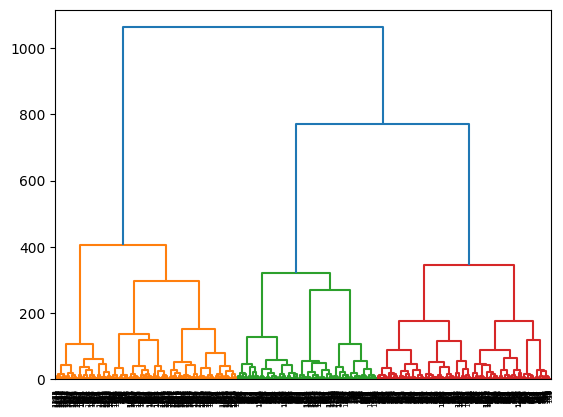

In [52]:
dendrogram=sch.dendrogram(sch.linkage(feature_arr,
                                      method='ward'))


In [53]:
hrc_clusters = 8

In [54]:
hrc=AgglomerativeClustering(n_clusters=hrc_clusters,
                            metric='euclidean',
                            linkage='ward')

In [57]:
pred_hrc=hrc.fit_predict(feature_arr)
pred_hrc

array([6, 0, 6, ..., 3, 3, 3], dtype=int64)

In [56]:
# Initialising the plot variable as str
hrc_fig1 = ""
hrc_fig2 = ""
hrc_fig3 = ""
hrc_fig4 = ""
hrc_fig5 = ""
hrc_fig6 = ""
hrc_fig7 = ""
hrc_fig8 = ""
hrc_fig9 = ""
hrc_fig10 = ""


# Storing the variables in list figures
hrc_figures = [hrc_fig1, hrc_fig2, hrc_fig3, hrc_fig4, hrc_fig5, hrc_fig6, hrc_fig7, hrc_fig8, hrc_fig9, hrc_fig10]


# Creating cluster graphs using for loop
for i in range(hrc_clusters):
    hrc_figures[i] = px.scatter(x = feature_arr[pred_hrc == i, 0],
                            y = feature_arr[pred_hrc == i, 1],
                            title = f'Cluster{i}') 
    hrc_figures[i].update_traces(marker=dict(color=color[i]))

# Initialising the trace list and then storing them into another list for looping
hrc_figure1_traces = []
hrc_figure2_traces = []
hrc_figure3_traces = []
hrc_figure4_traces = []
hrc_figure5_traces = []
hrc_figure6_traces = []
hrc_figure7_traces = []
hrc_figure8_traces = []
hrc_figure9_traces = []
hrc_figure10_traces = []

hrc_figures_traces = [hrc_figure1_traces, hrc_figure2_traces, hrc_figure3_traces, hrc_figure4_traces, hrc_figure5_traces, hrc_figure6_traces, hrc_figure7_traces, hrc_figure8_traces, hrc_figure9_traces, hrc_figure10_traces]



# Taking the elements from the plots and using them to create traces for the subplots
for i in range(hrc_clusters):
    for trace in range(len(hrc_figures[i]["data"])):
        hrc_figures[i]["data"][trace]['showlegend'] = False             
        hrc_figures_traces[i].append(hrc_figures[i]["data"][trace])

# Creting the subplot Figure
hrc_cluster_figure = make_subplots(rows = 1, cols = 1)

# Adding the traces to the figure
for i in range(hrc_clusters):
    for traces in hrc_figures_traces[i]:
        hrc_cluster_figure.append_trace(traces, row = 1, col = 1)

hrc_cluster_figure.update_layout(height = 800, width = 1000, title_text = "HRC Song Clusters", title_font_size = 25, template = 'plotly_dark')
    
hrc_cluster_figure.show()

# Thank You